In [1]:
from mesa.batchrunner import batch_run
from mesa_model.fungi_model import FungiModel
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

sns.set_context("paper")

In [2]:
parameters = {}


run = batch_run(
    FungiModel, 
    parameters,
    number_processes=1,
    data_collection_period=1,
    iterations=1,
    max_steps=99,
)

100%|██████████| 1/1 [00:07<00:00,  7.97s/it]


In [3]:
batch_df = pd.DataFrame(run)

In [4]:
batch_df.shape

(100, 9)

In [5]:
batch_df.head()

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,24,400.0,0.749976,16,8,5000
1,0,0,1,32,800.0,0.749928,24,8,5000
2,0,0,2,40,1200.0,0.749856,32,8,5000
3,0,0,3,48,1600.0,0.749760,40,8,5000
4,0,0,4,57,2000.0,0.749640,48,9,5000


In [6]:
batch_df[batch_df["iteration"] == 0]

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,24,400.000000,0.749976,16,8,5000
1,0,0,1,32,800.000000,0.749928,24,8,5000
2,0,0,2,40,1200.000000,0.749856,32,8,5000
3,0,0,3,48,1600.000000,0.749760,40,8,5000
4,0,0,4,57,2000.000000,0.749640,48,9,5000
...,...,...,...,...,...,...,...,...,...
95,0,0,95,7798,343103.708693,0.387687,7587,211,5000
96,0,0,96,7992,351249.995568,0.378258,7784,208,5000
97,0,0,97,8182,360120.546277,0.368805,7976,206,5000
98,0,0,98,8373,368357.723596,0.359394,8166,207,5000


In [7]:
batch_df[batch_df["Step"] == 0]

,RunId,iteration,Step,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,24,400.0,0.749976,16,8,5000


[Text(0.5, 1.0, 'Hyphal Length and Substrate levels over Time')]

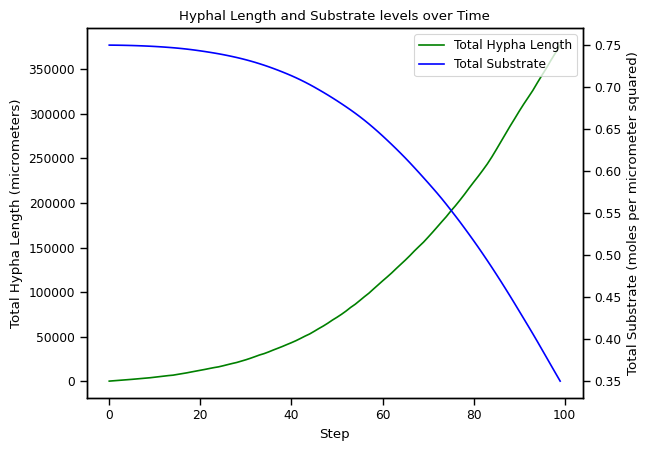

In [8]:
ax = plt.axes()
ax.set_ylabel("Total Hypha Length (micrometers)")
sns.lineplot(data=batch_df[["total_hypha_length", "Step"]], x="Step", y="total_hypha_length", color="g", ax=ax)
ax2 = plt.twinx()

total_hypha_line = mlines.Line2D([], [], color='green', label='Total Hypha Length')
total_substrate_line = mlines.Line2D([], [], color='blue', label='Total Substrate')
ax2.legend(handles=[total_hypha_line, total_substrate_line])
ax2.set_ylabel("Total Substrate (moles per micrometer squared)")
ax2.set_xlabel("Steps (0.01 Days)")
sns.lineplot(data=batch_df["total_substrate"], color="b", ax=ax2).set(
    title = "Hyphal Length and Substrate levels over Time"
)

[Text(0.5, 1.0, 'Number of hypha and spitzenkorpers over time')]

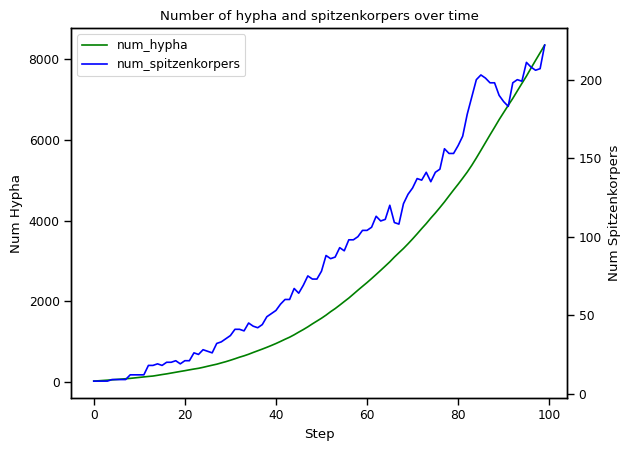

In [9]:
ax = plt.axes()
ax.set_ylabel("Num Hypha")
sns.lineplot(data=batch_df[["num_hypha", "Step"]], x="Step", y="num_hypha", color="g", ax=ax)
ax2 = plt.twinx()

num_hypha_line = mlines.Line2D([], [], color='green', label='num_hypha')
num_spitzenkorpers_line = mlines.Line2D([], [], color='blue', label='num_spitzenkorpers')
ax2.legend(handles=[num_hypha_line, num_spitzenkorpers_line])
ax2.set_ylabel("Num Spitzenkorpers")
ax2.set_xlabel("Steps (0.01 Days)")
sns.lineplot(data=batch_df["num_spitzenkorpers"], color="b", ax=ax2).set(
    title = "Number of hypha and spitzenkorpers over time"
)

- Mycoacia meridionalis  1100 µm / day

- Fomes fomentarius     1280 µm / day

- Lentinus crinitus     3060 µm / day

- Xylobolus subpileatus     1000 µm / day 

- Phlebia acerina 7400 µm / day 

In [10]:
parameters = {"extension_rate": [1100, 1280, 3060, 1000, 7400]}


run = batch_run(
    FungiModel, 
    parameters,
    number_processes=1,
    data_collection_period=1,
    iterations=10,
    max_steps=99,
)

100%|██████████| 50/50 [09:19<00:00, 11.19s/it]


In [11]:
batch_df = pd.DataFrame(run)

In [12]:
batch_df.shape

(5000, 10)

In [13]:
batch_df.head()

,RunId,iteration,Step,extension_rate,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,1100,24,88.0,0.749976,16,8,1100
1,0,0,1,1100,32,176.0,0.749928,24,8,1100
2,0,0,2,1100,40,264.0,0.749856,32,8,1100
3,0,0,3,1100,49,352.0,0.749760,40,9,1100
4,0,0,4,1100,58,440.0,0.749640,49,9,1100


In [14]:
batch_df[batch_df["iteration"] == 0]

,RunId,iteration,Step,extension_rate,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,1100,24,88.000000,0.749976,16,8,1100
1,0,0,1,1100,32,176.000000,0.749928,24,8,1100
2,0,0,2,1100,40,264.000000,0.749856,32,8,1100
3,0,0,3,1100,49,352.000000,0.749760,40,9,1100
4,0,0,4,1100,58,440.000000,0.749640,49,9,1100
...,...,...,...,...,...,...,...,...,...,...
495,4,0,95,7400,4869,315391.471801,0.401532,4776,93,7400
496,4,0,96,7400,4957,320368.979616,0.394767,4866,91,7400
497,4,0,97,7400,5036,325784.383692,0.388032,4951,85,7400
498,4,0,98,7400,5119,331047.446815,0.381408,5031,88,7400


In [15]:
batch_df[batch_df["Step"] == 0]

,RunId,iteration,Step,extension_rate,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate
0,0,0,0,1100,24,88.0,0.749976,16,8,1100
100,1,0,0,1280,25,102.4,0.749976,16,9,1280
200,2,0,0,3060,24,244.8,0.749976,16,8,3060
300,3,0,0,1000,24,80.0,0.749976,16,8,1000
400,4,0,0,7400,24,592.0,0.749976,16,8,7400
500,5,1,0,1100,24,88.0,0.749976,16,8,1100
600,6,1,0,1280,24,102.4,0.749976,16,8,1280
700,7,1,0,3060,24,244.8,0.749976,16,8,3060
800,8,1,0,1000,24,80.0,0.749976,16,8,1000
900,9,1,0,7400,24,592.0,0.749976,16,8,7400


In [16]:
spec_dict = {
    1100: 'Mycoacia meridionalis',
    1280: 'Fomes fomentarius',
    3060: 'Lentinus crinitus',
    1000: 'Xylobolus subpileatus',
    7400: 'Phlebia acerina'
}

In [17]:
batch_df['extension_rate'][1]

1100

In [18]:
species = []
for i in range(len(batch_df)):
    species.append(f'{spec_dict[batch_df["extension_rate"][i]]}, {batch_df["extension_rate"][i]} micrometers per day')
    
batch_df['Species, Growth Rate'] = species

In [19]:
batch_df[batch_df["Step"] == 0]

,RunId,iteration,Step,extension_rate,agent_count,total_hypha_length,total_substrate,num_hypha,num_spitzenkorpers,extesion_rate,"Species, Growth Rate"
0,0,0,0,1100,24,88.0,0.749976,16,8,1100,"Mycoacia meridionalis, 1100 micrometers per day"
100,1,0,0,1280,25,102.4,0.749976,16,9,1280,"Fomes fomentarius, 1280 micrometers per day"
200,2,0,0,3060,24,244.8,0.749976,16,8,3060,"Lentinus crinitus, 3060 micrometers per day"
300,3,0,0,1000,24,80.0,0.749976,16,8,1000,"Xylobolus subpileatus, 1000 micrometers per day"
400,4,0,0,7400,24,592.0,0.749976,16,8,7400,"Phlebia acerina, 7400 micrometers per day"
500,5,1,0,1100,24,88.0,0.749976,16,8,1100,"Mycoacia meridionalis, 1100 micrometers per day"
600,6,1,0,1280,24,102.4,0.749976,16,8,1280,"Fomes fomentarius, 1280 micrometers per day"
700,7,1,0,3060,24,244.8,0.749976,16,8,3060,"Lentinus crinitus, 3060 micrometers per day"
800,8,1,0,1000,24,80.0,0.749976,16,8,1000,"Xylobolus subpileatus, 1000 micrometers per day"
900,9,1,0,7400,24,592.0,0.749976,16,8,7400,"Phlebia acerina, 7400 micrometers per day"


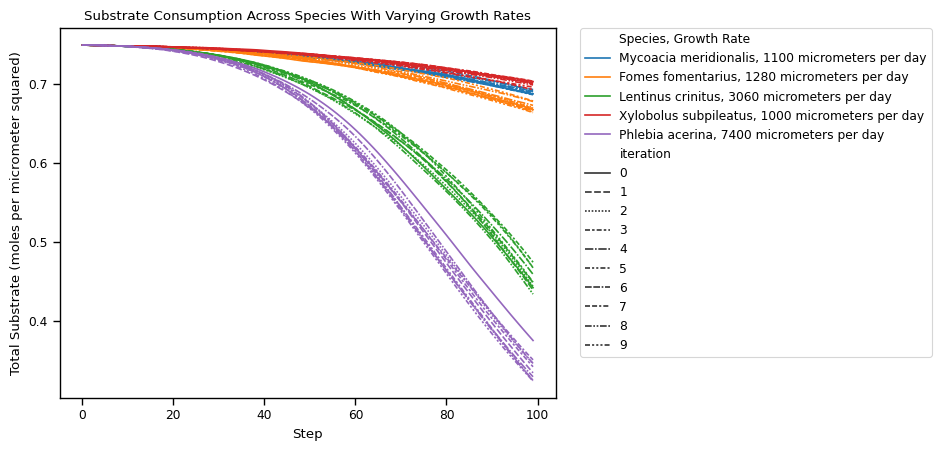

In [20]:
sns.lineplot(
    data=pd.melt(batch_df, id_vars=['Step', 'Species, Growth Rate', 'iteration'], value_vars=['total_substrate'], value_name='Total Substrate (moles per micrometer squared)'),
    x='Step',
    y='Total Substrate (moles per micrometer squared)',
    hue='Species, Growth Rate',
    style= 'iteration'
).set(
    title= 'Substrate Consumption Across Species With Varying Growth Rates'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)